<a href="https://colab.research.google.com/github/rishi-latchmepersad/TinyML-Home-Weather-Forecasting/blob/main/measurements/power_measurements_quickview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Power measurements quick view

This notebook provides a quick visualization of the data stored in `measurements/power_measurements.csv`. It parses the timestamps, cleans numeric columns, computes an estimated wattage, and plots the power trend alongside voltage and current for context.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load and normalize the data
DATA_PATH = Path("measurements") / "power_measurements.csv"
df = pd.read_csv(DATA_PATH)

# Parse timestamps and strip units
# Adjust the format string if your dates use a different ordering
# (e.g., day-first vs. month-first)
df = df.rename(columns={"datetime": "timestamp"})
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%m/%d/%Y %H:%M", errors="coerce")

df["voltage_v"] = df["voltage"].str.rstrip("V").astype(float)
df["current_a"] = df["current"].str.rstrip("A").astype(float)
df["power_factor"] = pd.to_numeric(df["power_factor"], errors="coerce")

# Compute estimated real power in watts
# P = V * I * power_factor
df["power_mW"] = df["voltage_v"] * df["current_a"] * df["power_factor"]*1000

# Keep sorted, valid rows
clean_df = df.dropna(subset=["timestamp", "power_mW"]).sort_values("timestamp").reset_index(drop=True)
clean_df.head()


,timestamp,voltage,current,power_factor,model_name,voltage_v,current_a,power_mW
0,2025-03-12 07:11:00,123.0V,0.021A,0.38,cnn_v3,123.0,0.021,981.540
1,2025-03-12 07:15:00,122.9V,0.020A,0.40,cnn_v3,122.9,0.020,983.200
2,2025-03-12 07:20:00,123.2V,0.021A,0.38,cnn_v3,123.2,0.021,983.136
3,2025-03-12 07:30:00,123.3V,0.020A,0.40,cnn_v3,123.3,0.020,986.400
4,2025-03-12 07:34:00,123.4V,0.019A,0.42,cnn_v3,123.4,0.019,984.732


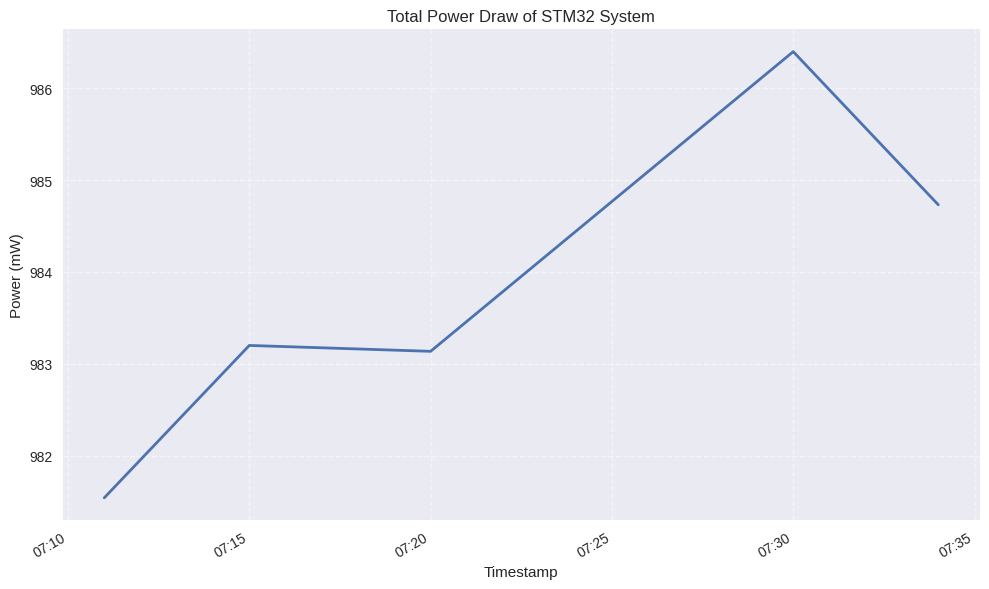

In [19]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(clean_df["timestamp"], clean_df["power_mW"], label="Estimated power (mW)", linewidth=2)
ax.set_xlabel("Timestamp")
ax.set_ylabel("Power (mW)")
ax.tick_params(axis="y")

# Set a more readable date format for the x-axis
date_form = DateFormatter("dd/mm %H:%M")
ax.xaxis.set_major_formatter(date_form)
fig.autofmt_xdate() # Automatically rotate and align date tick labels

# Combine legends
lines = ax.get_lines()
labels = [line.get_label() for line in lines]

ax.set_title("Total Power Draw of STM32 System")
ax.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()